<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/Machine%20Learning%20%26%20Deep%20Learning%20Projects/Medical_Insuarance_Premium_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#import dependances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor

In [2]:
#load dataset
dataset = pd.read_csv("/content/insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.select_dtypes(include="object").columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [6]:
dataset.select_dtypes(include=["int64", "float64"]).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
dataset.groupby("sex").mean(["age", "bmi", "children"])

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [13]:
dataset.groupby("region").mean(["age", "bmi", "children"])

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [14]:
dataset.isnull().values.any()

False

In [15]:
#encode categorical data

dataset.select_dtypes(include="object").columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [16]:
dataset["sex"].unique()

array(['female', 'male'], dtype=object)

In [17]:
 dataset["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [18]:
dataset["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
  dataset = pd.get_dummies(data=dataset, drop_first=True)
  dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


<Axes: title={'center': 'Correlation with Charges'}>

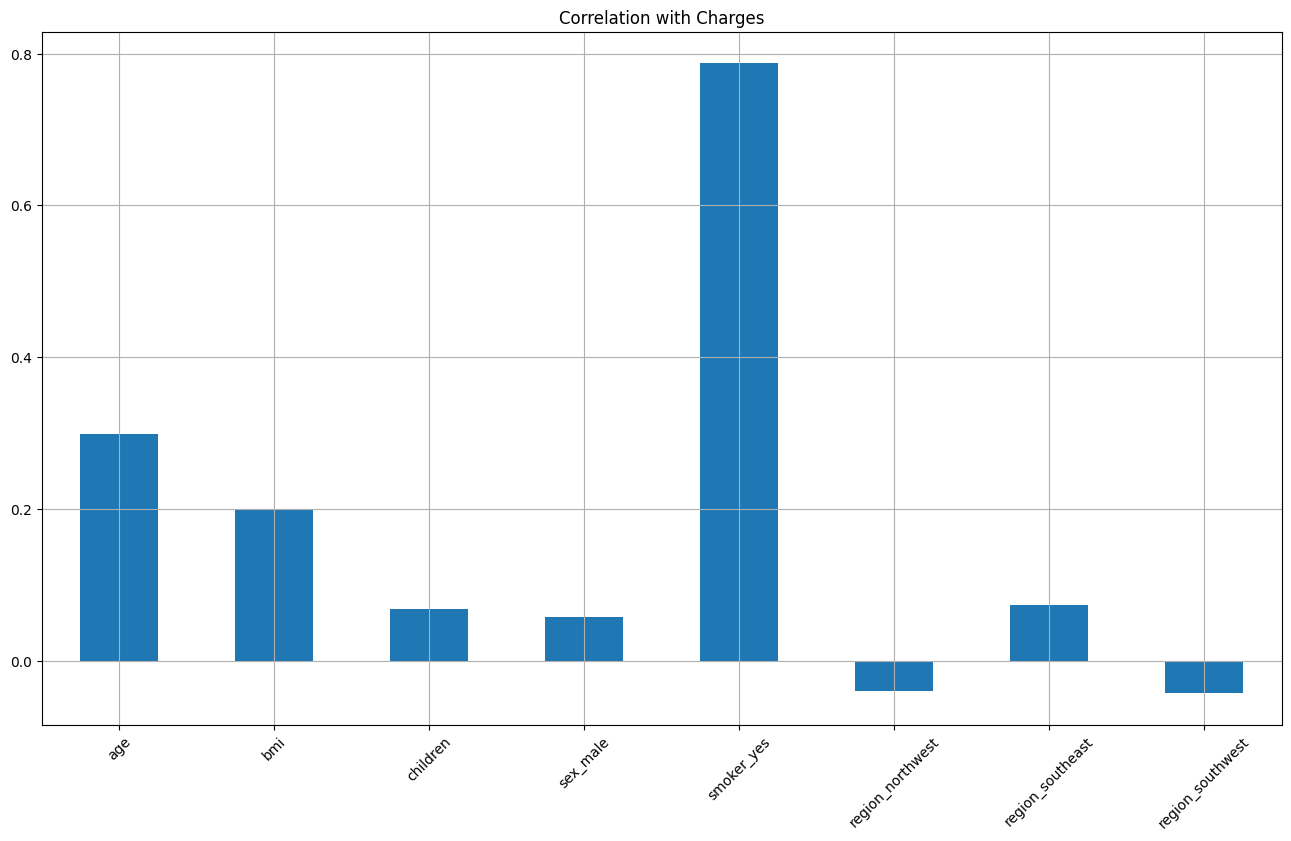

In [26]:
#check correlation

data = dataset.drop(columns="charges")

data.corrwith(dataset["charges"]).plot.bar(
    figsize=(16, 9), title="Correlation with Charges", rot=45, grid=True
)

<Axes: >

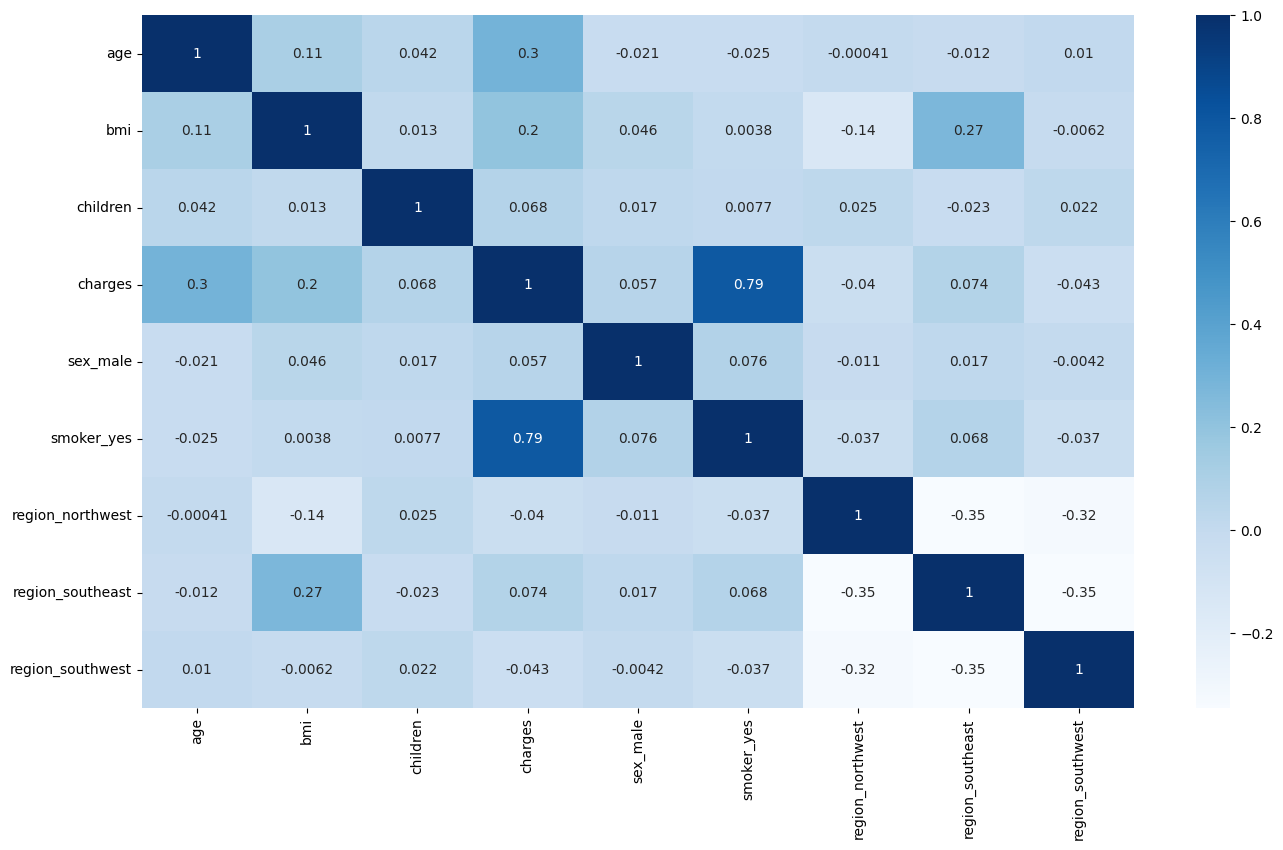

In [28]:
corr = dataset.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True, cmap="Blues")

In [30]:
#separate features and target
X = dataset.drop(columns="charges")
y = dataset["charges"]

#split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 8) (1070, 8) (268, 8)


In [32]:
#standadising the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.33631918 -1.41805377 -0.93004238 ... -0.56079971 -0.61407766
  -0.56943606]
 [-0.18052529  0.03017623  1.56197434 ...  1.78316783 -0.61407766
  -0.56943606]
 [ 1.33645421  0.39886179 -0.93004238 ... -0.56079971 -0.61407766
   1.75612342]
 ...
 [ 1.55316556  2.10558593 -0.93004238 ... -0.56079971 -0.61407766
   1.75612342]
 [ 0.83079438 -0.81075823 -0.09937014 ... -0.56079971 -0.61407766
   1.75612342]
 [ 1.33645421  0.28204232 -0.09937014 ... -0.56079971 -0.61407766
  -0.56943606]]
[[-1.19184495 -1.13470442 -0.93004238 ... -0.56079971 -0.61407766
  -0.56943606]
 [ 1.11974285 -0.1429817  -0.93004238 ... -0.56079971 -0.61407766
  -0.56943606]
 [ 0.75855726 -0.53652246 -0.09937014 ... -0.56079971 -0.61407766
  -0.56943606]
 ...
 [ 1.55316556 -0.26891474 -0.93004238 ...  1.78316783 -0.61407766
  -0.56943606]
 [ 0.61408302  1.09315054  0.7313021  ... -0.56079971  1.62845851
  -0.56943606]
 [ 0.83079438 -0.97728811  0.7313021  ...  1.78316783 -0.61407766
  -0.56943606]]


# Building the models

In [36]:
#Linear Regression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lr_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.7449415564623686

In [41]:
#Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
y_pred = rf_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.8368226551326117

In [44]:
#XGBRFRegressor Regressor
xgb_regressor = XGBRFRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [45]:
y_pred = xgb_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.8666787530061048

Predicting single observation

In [46]:
 input_data = [[40, 45.5, 4, 1, 1, 0, 0, 0]]
 xgb_regressor.predict(sc.transform(input_data))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43770.332], dtype=float32)